In [13]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tqdm
import random
import math

from experiments.npe_bt.model import get_npe_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
with open('data_blocktower.p', 'rb') as f:
    data = pickle.load(f)

In [27]:
train_x, train_y = data['train']

c = list(zip(train_x, train_y))
random.shuffle(c)
train_x, train_y = zip(*c)

val_x, val_y = data['val']

c = list(zip(val_x, val_y))
random.shuffle(c)
val_x, val_y = zip(*c)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )
    return ax

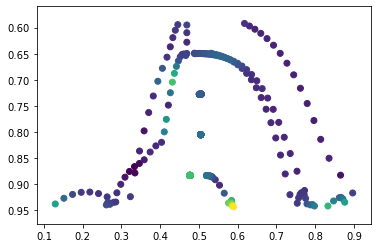

In [28]:
px = []
py = []

for t in range(len(train_x)):
    points_p = np.array([train_x[t][i][:2] for i in range(6)])
    points_n = np.array([train_x[t][i][2:] for i in range(6)])

#     plt.scatter(points_p[:, 0], points_p[:, 1])
#     plt.scatter(points_n[:, 0], points_n[:, 1])
#     plt.scatter([train_x[t][0][2:][0] + train_y[t][0]], [train_x[t][0][2:][1] + train_y[t][1]])

    # Position
    px.append(train_x[t][0][3:5][0] + train_y[t][0] * 1/1000.0)
    py.append(train_x[t][0][3:5][1] + train_y[t][1] * 1/1000.0)
    
    # Velocity
#     px.append(points_n[0][0] - points_p[0][0])
#     py.append(points_n[0][1] - points_p[0][1])
    
#     px.append(points_p[0][0])
#     py.append(points_p[0][1])
    
density_scatter(np.array(px), np.array(py), bins=10).invert_yaxis()

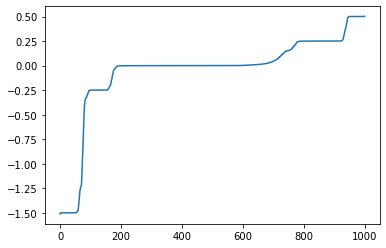

In [30]:
prot = []

for t in range(len(train_x)):
    # Position
    prot.append(train_x[t][0][5] + train_y[t][2] * 1/1000.0)
    
plt.plot(sorted(np.array(prot)))

In [25]:
train_y[0]

array([1.22558773e-06, 1.28280879e-07, 1.34812369e-06])